In [33]:
#download data  = https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D

Using matplotlib backend: TkAgg


In [34]:
data = pd.read_csv(r"creditcard.csv") 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
data.value_counts("Class")

Class
0    284315
1       492
Name: count, dtype: int64

In [73]:
#The original data had a size of 283807 x 31, I will reduce it to 20492 to make the example.
df_positivo = data[data["Class"] == 0][:20000]
df_negativo = data[data["Class"] == 1][:492]
data = pd.concat([df_positivo, df_negativo])
print(f"the before data is: \n{data.value_counts("Class")}")
#split data to work with smote "X" and "y"
X = data.drop("Class", axis=1)
y = data["Class"]
#necessary library
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
data = pd.concat([pd.DataFrame(x_smote, columns=X.columns), pd.DataFrame(y_smote, columns=["Class"])], axis=1)
print(f"the after data is: \n{data.value_counts("Class")}")

the before data is: 
Class
0    20000
1      492
Name: count, dtype: int64
the after data is: 
Class
0    20000
1    20000
Name: count, dtype: int64


In [39]:
#dividir datos x y
X = data.drop("Class", axis=1)
y = data["Class"]

In [40]:
#convertir array
X = np.array(X)
y = np.array(y)

In [41]:
#dividir datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(x_train.shape, x_test.shape)

(32000, 30) (8000, 30)


In [42]:
#preprosesamiento de datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [43]:
#crear modelo sequencial
model = Sequential()

In [44]:
#capa Conv1D
model.add(Conv1D(filters=64, kernel_size=(3), activation='relu', input_shape=(x_train.shape[1], 1)))

c:\Users\jchav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [45]:
#capa Maxpooling1D
model.add(MaxPooling1D(pool_size=2))

In [46]:
#agregar otra capa de conv1D
model.add(Conv1D(filters=128, kernel_size=(3), activation='relu'))

In [47]:
#agregar otra capa de maxpooling1D
model.add(MaxPooling1D(pool_size=2))

In [48]:
#aplanar resultados
model.add(Flatten())

In [49]:
#agregar capa dense
model.add(Dense(units=64, activation='relu'))

In [50]:
#agregar otra capa de dense
model.add(Dense(units=2, activation='softmax'))

In [51]:
#mostrar resultados
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 12, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,306 (290.26 KB)

 Trainable params: 74,306 (290.26 KB)

 Non-trainable params: 0 (0.00 B)

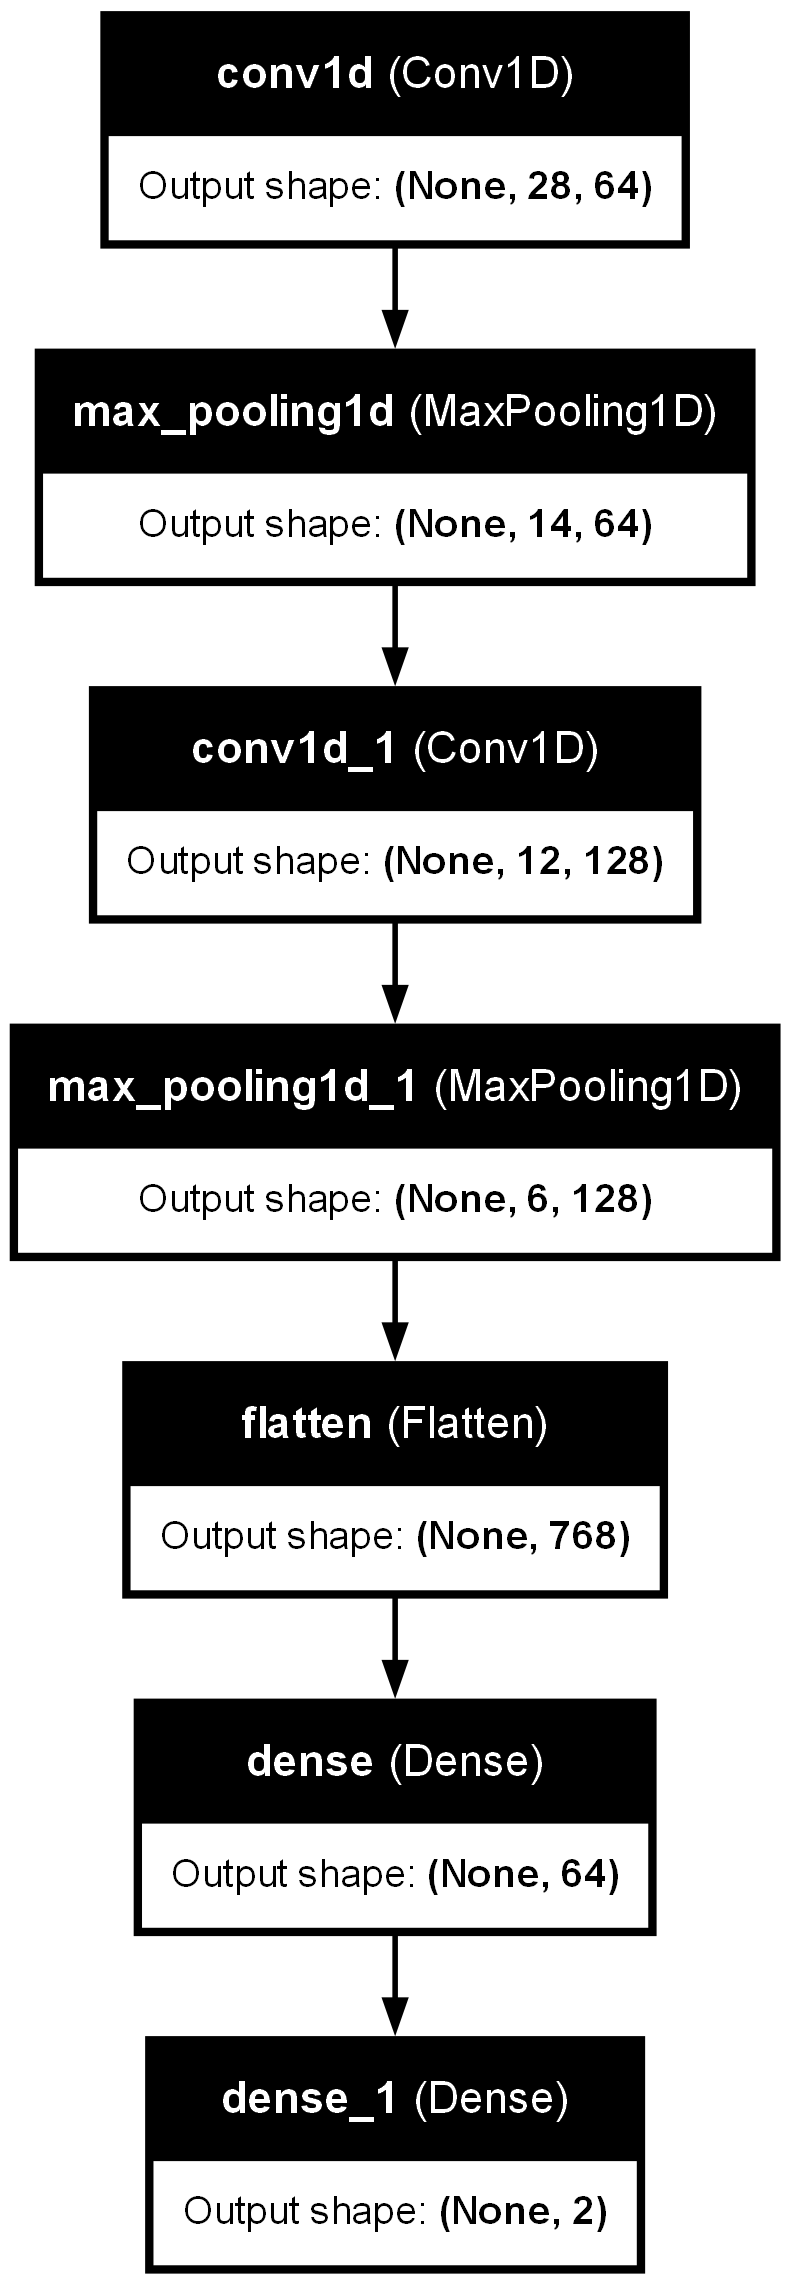

In [52]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display
plot_model(model, to_file="covnet2.png", show_shapes=True, show_layer_names=True)
display(Image(filename="covnet2.png"))

In [53]:
#compilar modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
#adaptar x_train y x_test para trabajar con conv1d
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [55]:
#entrenar modelo fit
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9688 - loss: 0.0894 - val_accuracy: 0.9975 - val_loss: 0.0100
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9956 - loss: 0.0151 - val_accuracy: 0.9980 - val_loss: 0.0087
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9972 - loss: 0.0089 - val_accuracy: 0.9989 - val_loss: 0.0038
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9980 - loss: 0.0088 - val_accuracy: 0.9996 - val_loss: 0.0019
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9980 - loss: 0.0055 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9996 - val_loss: 0.0022
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9989 - loss: 0.0035 - val_accuracy: 0.9999 - val_loss: 0.0013
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accurac

In [56]:
#evaluar modelo
loss, accuracy = model.evaluate(x_test, y_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.9995 - loss: 0.0023


In [57]:
loss, accuracy

(0.002282816218212247, 0.999625027179718)

In [58]:
pronostico = model.predict(x_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step


In [59]:
y_test[0]

0

In [60]:
for index, probability in enumerate(pronostico[0]):
    print(f'{index}: {probability:.10%}')

0: 99.9999523163%
1: 0.0000509200%


In [64]:
x_test.shape

(8000, 30, 1)

In [65]:
images = x_test.reshape((8000, 30)) 
incorrect_predictions = []

In [66]:
for i, (p, e) in enumerate(zip(pronostico, y_test)): 
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))
len(incorrect_predictions)

3997

In [67]:
def display_probabilities(prediction):
        for index, probability in enumerate(prediction):
            print(f'{index}: {probability:.10%}')

In [68]:
display_probabilities(pronostico[0])

0: 99.9999523163%
1: 0.0000509200%


In [69]:
model.save('Creditfraud.h5')